## Project Battle
This project will use basic natural language processing techniques to perform analysis on customer reviews of two well known video games franchises - Battlefield and Call of Duty.
Both games are traditional first person shooters (FPS) with multiplayer game modes. They compete for customer playing time to fill in their servers and keep the game alive. Both have large fan/player communities that look forward to the next release (usually with very high expections) 

- First, I will use webscraping techniques to get customer reviews of 2 recent releases from each franchise.
    - https://www.metacritic.com/game/playstation-4/battlefield-1
    - https://www.metacritic.com/game/playstation-4/battlefield-v
    - https://www.metacritic.com/game/playstation-4/call-of-duty-black-ops-4
    - https://www.metacritic.com/game/playstation-4/call-of-duty-infinite-warfare
- Second, I will prepare the data for analysis by performing cleaning and processing work.
- Third, Tokenize the data and perform exploratory analysis.
- Lastly, Use clustering techniques to find out topics that negative customer reviews tend to converge into (aka topic model) 

## Scrape data from Metacritic.com

In [189]:
# Load libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [190]:
# Let's build a function and scrape other games
def scrape_game_reviews(url_without_page, page_max, game_name):
    
    """
    Scrape game reviews from metacritic
    
    url_without_page: a string containing the url of the page to be scraped; remove the page number
    page_max: input the number of the last page of the user review list
    game_name: string containing the name of the game
    
    """
    headers = {"user-agent": "user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}
    no = []
    name = []
    date = []
    score = []
    review = []
    game_title = []
    print(f"Preparing to scrape {game_name}...")
    
    for pg in range(page_max):        
        url = url_without_page+str(pg)
        page = requests.get(url, headers=headers)
        soup=BeautifulSoup(page.content, "html.parser")
        print(f"starting page {pg}...")
        for idx, reviews in enumerate(soup.findAll("div", class_="review_section")):
            
            no.append(idx)
            try:
                name.append(soup.findAll("div", class_="name")[idx].text.replace("\n",""))
            except:
                name.append("NA")
            try:
                date.append(soup.findAll("div", class_="date")[idx].text.replace("\n",""))
            except:
                date.append("NA")
            try:
                score.append(soup.findAll("div", class_="review_grade")[idx].text.replace("\n",""))
            except:
                score.append("NA")
            try:
                review.append(soup.findAll("div", class_="review_body")[idx].text.replace("\n",""))
            except:
                review.append("NA")
            try:
                game_title.append(game_name)
            except:
                game_title.append("NA")

                    
    print("storing the data...")
    # Store lists into a dictionary
    review_data = {"game_title": game_title, "name":name, "date":date, "score":score, "review":review}
    print(f"{game_name} scraped successfully!")
    return review_data

In [191]:
# Scrape Battlefield 1

# Inputs for my webscraping function
url = "https://www.metacritic.com/game/playstation-4/battlefield-1/user-reviews?sort-by=date&num_items=100&page="
pg = 5
name = "Battlefield 1"

# Run function and store the dictionary output
review = scrape_game_reviews(url, pg, name)

# Transfer data into a dataframe
bf1 = pd.DataFrame(review)

# Remove NAs
bf1 = bf1[bf1["name"]!="NA"]

Preparing to scrape Battlefield 1...
starting page 0...
starting page 1...
starting page 2...
starting page 3...
starting page 4...
storing the data...
Battlefield 1 scraped successfully!


In [192]:
bf1.shape

(418, 5)

In [193]:
# Scrape Battlefield 5

# Inputs for my webscraping function
url = "https://www.metacritic.com/game/playstation-4/battlefield-v/user-reviews?sort-by=date&num_items=100&page="
pg = 10
name = "Battlefield 5"

# Run function and store the dictionary output
review = scrape_game_reviews(url, pg, name)

# Transfer data into a dataframe
bf5 = pd.DataFrame(review)

# Remove NAs
bf5 = bf5[bf5["name"]!="NA"]

Preparing to scrape Battlefield 5...
starting page 0...
starting page 1...
starting page 2...
starting page 3...
starting page 4...
starting page 5...
starting page 6...
starting page 7...
starting page 8...
starting page 9...
storing the data...
Battlefield 5 scraped successfully!


In [194]:
bf5.shape

(912, 5)

In [195]:
# Scrape Call of Duty Black Ops 4

# Inputs for my webscraping function
url = "https://www.metacritic.com/game/playstation-4/call-of-duty-black-ops-4/user-reviews?sort-by=date&num_items=100&page="
pg = 10
name = "Call of Duty BO4"

# Run function and store the dictionary output
review = scrape_game_reviews(url, pg, name)

# Transfer data into a dataframe
codbo4 = pd.DataFrame(review)

# Remove NAs
codbo4 = codbo4[codbo4["name"]!="NA"]

Preparing to scrape Call of Duty BO4...
starting page 0...
starting page 1...
starting page 2...
starting page 3...
starting page 4...
starting page 5...
starting page 6...
starting page 7...
starting page 8...
starting page 9...
storing the data...
Call of Duty BO4 scraped successfully!


In [196]:
codbo4.shape

(551, 5)

In [197]:
# Scrape Call of Duty Black Ops 4

# Inputs for my webscraping function
url = "https://www.metacritic.com/game/playstation-4/call-of-duty-infinite-warfare/user-reviews?sort-by=date&num_items=100&page="
pg = 10
name = "Call of Duty IW"

# Run function and store the dictionary output
review = scrape_game_reviews(url, pg, name)

# Transfer data into a dataframe
codiw = pd.DataFrame(review)

# Remove NAs
codiw = codiw[codiw["name"]!="NA"]

Preparing to scrape Call of Duty IW...
starting page 0...
starting page 1...
starting page 2...
starting page 3...
starting page 4...
starting page 5...
starting page 6...
starting page 7...
starting page 8...
starting page 9...
storing the data...
Call of Duty IW scraped successfully!


In [198]:
codiw.shape

(405, 5)

In [199]:
# Let's store the reviews in a pickle format
# Next time I open this notebook, I can start from here

import pickle

bf1.to_pickle("bf1_reviews.pickle")
bf5.to_pickle("bf5_reviews.pickle")
codbo4.to_pickle("codbo4_reviews.pickle")
codiw.to_pickle("codiw_reviews.pickle")

In [200]:
bf5.head()

,game_title,name,date,score,review
0,Battlefield 5,Goji0v,"Jun 20, 2022",8,After last BF this is really so good. Optimiza...
1,Battlefield 5,DRAVBER,"Jun 18, 2022",0,"гендер филд 5\r0 фемок из 10\rЕдинственный +, ..."
2,Battlefield 5,Skapple,"May 29, 2022",0,i didn't play the game on realease but rn it's...
3,Battlefield 5,14Vladislav88,"Apr 19, 2022",0,"Женщины ""спасающие"" мир от ""злых"" националисто..."
4,Battlefield 5,angrygamer333,"Jul 7, 2019",6,The most dissapointing game of the battlefield...


## Process the Data

In [1]:
# Load libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

bf1 = pd.read_pickle("bf1_reviews.pickle")
bf5 = pd.read_pickle("bf5_reviews.pickle")
codbo4 = pd.read_pickle("codbo4_reviews.pickle")
codiw = pd.read_pickle("codiw_reviews.pickle")

C:\Users\ochib\miniconda3\envs\nlp_course\lib\site-packages\requests\__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
# Use langid library to automatically detect languages

import langid
bf5["lang"] = bf5.apply(lambda x: langid.classify(x["review"])[0], axis=1)
bf1["lang"] = bf1.apply(lambda x: langid.classify(x["review"])[0], axis=1)
codbo4["lang"] = codbo4.apply(lambda x: langid.classify(x["review"])[0], axis=1)
codiw["lang"] = codiw.apply(lambda x: langid.classify(x["review"])[0], axis=1)

In [3]:
bf5[bf5["lang"]=="en"].head()

,game_title,name,date,score,review,lang
0,Battlefield 5,Goji0v,"Jun 20, 2022",8,After last BF this is really so good. Optimiza...,en
2,Battlefield 5,Skapple,"May 29, 2022",0,i didn't play the game on realease but rn it's...,en
4,Battlefield 5,angrygamer333,"Jul 7, 2019",6,The most dissapointing game of the battlefield...,en
6,Battlefield 5,DoritosGamer,"Mar 21, 2022",8,"One of the best Battlefield i was played, he h...",en
7,Battlefield 5,dankmeow,"Mar 16, 2022",7,Its battlefield again but it feels it doesnt q...,en


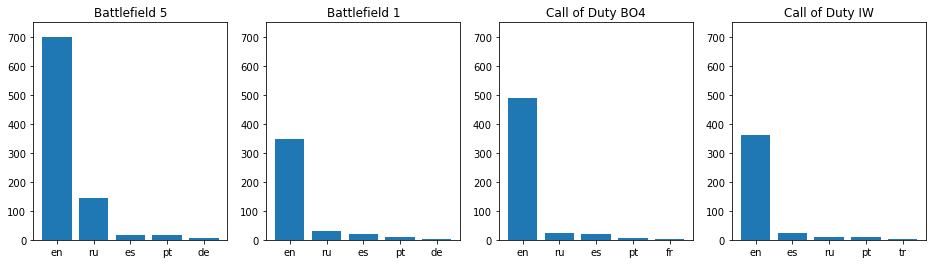

In [4]:
# Just out of curiosity, let's which languages reviews were written in:
def count_top5_languages(data):
    return data[["lang", "review"]].groupby("lang").agg("count").sort_values("review", ascending=False).head()


fig, axs = plt.subplots(1,4, figsize=(16,4))
for ax, game in zip(axs.ravel(), [bf5, bf1, codbo4, codiw]):
    lang_count = count_top5_languages(game)
    ax.bar(x=lang_count.index, height=lang_count["review"])
    ax.set_title(game.loc[0,"game_title"])
    ax.set_ylim(0,750)
    plt.tight_layout

There are reviews written in languages other than English. We will need to remove those before tokenization.

In [5]:
bf5_en = bf5[bf5["lang"]=="en"].reset_index(drop=True)
bf1_en = bf1[bf1["lang"]=="en"].reset_index(drop=True)
codbo_en = codbo4[codbo4["lang"]=="en"].reset_index(drop=True)
codiw_en = codiw[codiw["lang"]=="en"].reset_index(drop=True)

# Shapes of each dataset (only English reviews)
print(bf5_en.shape)
print(bf1_en.shape)
print(codbo_en.shape)
print(codiw_en.shape)

(700, 6)
(347, 6)
(489, 6)
(362, 6)


In [6]:
bf1_en.head()

,game_title,name,date,score,review,lang
0,Battlefield 1,HuevoAlce,"Jun 27, 2022",7,Battlefield 1 offers a great multiplayer exper...,en
1,Battlefield 1,geo333,"Jun 17, 2022",8,This is a great historical video game based on...,en
2,Battlefield 1,Jackyyu,"Apr 27, 2022",8,many people deem battlefield 1 to be one of th...,en
3,Battlefield 1,TjCytora,"Apr 25, 2022",9,This is back in the day not now. But this game...,en
4,Battlefield 1,Vaas69,"Apr 18, 2022",7,I Think this game rating is Way too High All t...,en


## Tokenization and EDA

In [7]:
# Import Spacy with English vocabulary 
import spacy
import en_core_web_sm

nlp = spacy.load("en_core_web_sm")

In [8]:
# Let's tokenize the first BF5 review and check results
# Make sure to remove punctionations

doc = nlp(bf5_en["review"][1])
for token in doc:
    if token.pos_ == "PUNCT":
        pass
    else: 
        print(f"{token.text:{12}} {token.lemma_:{15}} {token.pos_:{8}} {token.dep_:{10}} {token.tag_:{5}} {token.is_stop:{5}}")

i            i               PRON     nsubj      PRP       1
did          do              VERB     aux        VBD       1
n't          not             ADV      neg        RB        0
play         play            VERB     ROOT       VB        0
the          the             DET      det        DT        1
game         game            NOUN     dobj       NN        0
on           on              ADP      prep       IN        1
realease     realease        NOUN     pobj       NN        0
but          but             CCONJ    cc         CC        1
rn           rn              ADP      ROOT       IN        0
it           -PRON-          PRON     nsubj      PRP       1
's           be              VERB     ROOT       VBZ       0
very         very            ADV      advmod     RB        1
fun          fun             ADJ      acomp      JJ        0
and          and             CCONJ    cc         CC        1
i            i               PRON     nsubj      PRP       1
like         like       

In [540]:
# All seems to be working fine.
# Let's make a list of relevant tokens for each video game.

# Customize stop words
for new_stopword in ['battlefield', 'bf', 'game', 'games', '1','3', 'this', 'the', '\r', '\r ', '\r  ', ' ', "'s", 'like', 'cod', 'black', 'ops', '2', '>', '4', 'play', 'warfare', 'infinite', 'expand', 'feel', "'ve"]:
    nlp.Defaults.stop_words.add(new_stopword)
    nlp.vocab[new_stopword].is_stop = True

# Grabs dataframe, loops through every review, tokenize every relevant word, and stores it in a list
def tokenize_and_store(input_data):
    output_data = []
    for idx in range(input_data.shape[0]):
        doc = nlp(input_data.loc[idx,"review"])
        for token in doc:
            if nlp.vocab[str(token.lower_)].is_stop == False and token.is_punct == False and token.lemma_ != "be" and token.lemma_ != "not"and token.pos_ != "PRON":
                output_data.append(token.lower_)
    return output_data

In [541]:
# Run function for every game

bf5_en_words = tokenize_and_store(bf5_en)
bf1_en_words = tokenize_and_store(bf1_en)
codbo_en_words = tokenize_and_store(codbo_en)
codiw_en_words = tokenize_and_store(codiw_en)

In [542]:
# Count word occurrences in each game review

from collections import Counter
word_freq_bf5 = Counter(bf5_en_words)
word_freq_bf1 = Counter(bf1_en_words)
word_freq_codbo = Counter(codbo_en_words)
word_freq_codiw = Counter(codiw_en_words)

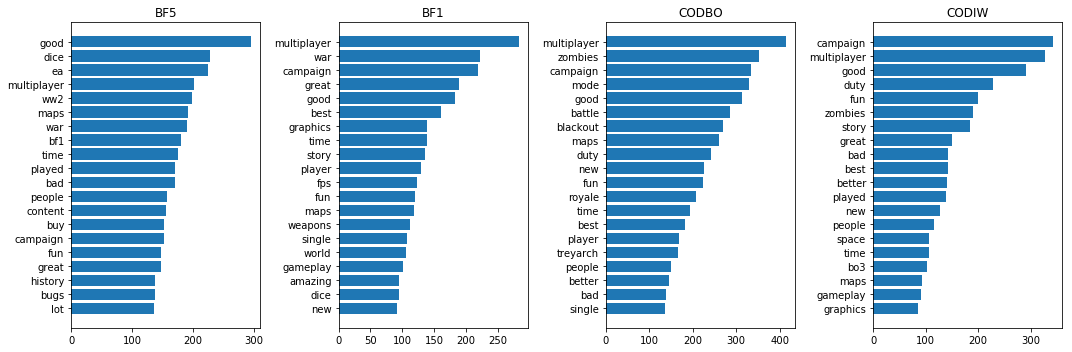

In [543]:
# Visualize top X words for each game review

def build_mostcommon_graph(word_freq_data, top_x=20, fig_width=15, fig_height=5):
    fig, axs = plt.subplots(1,4, figsize=(fig_width,fig_height))
    for ax, freq, title in zip(axs.ravel(), word_freq_data, ["BF5", "BF1", "CODBO", "CODIW"]):
        y = [i[0] for i in freq.most_common(top_x)]
        width = [i[1] for i in freq.most_common(top_x)] 
        vizdata = pd.DataFrame(data = list(zip(y, width)), columns=["y","width"]).sort_values("width", ascending=True)
        ax.barh (vizdata["y"], vizdata["width"])
        ax.set_title(title)
    plt.tight_layout()
    return plt.show()
    
build_mostcommon_graph([word_freq_bf5, word_freq_bf1, word_freq_codbo, word_freq_codiw])

A quick glimpse of what has been talked about the games. The list for BF5, COD Blackops, and COD Infinite Warfare shows the word "bad" among top 20 most quoted words. It seems like zombies are a major part of COD games.

In [550]:
# let's try to visualize top occurrences for each game in a word cloud
# First we need to process all reviews to become a single string

# tupple containing game name and reviews
reviews_list = list(zip(["BF5", "BF1", "CODBO", "CODIW"],[bf5_en["review"], bf1_en["review"], codbo_en["review"], codiw_en["review"]]))

# loop and merge all reviews into a single string
onestring = []
for k, v in reviews_list:
    text_list = ""
    for t in v:
        text_list += "".join(t.lower())
    onestring.append(text_list)

# rebuild tuple with a third element containing the string    
reviews_list_string = list(zip(["BF5", "BF1", "CODBO", "CODIW"],[bf5_en["review"], bf1_en["review"], codbo_en["review"], codiw_en["review"]], onestring))

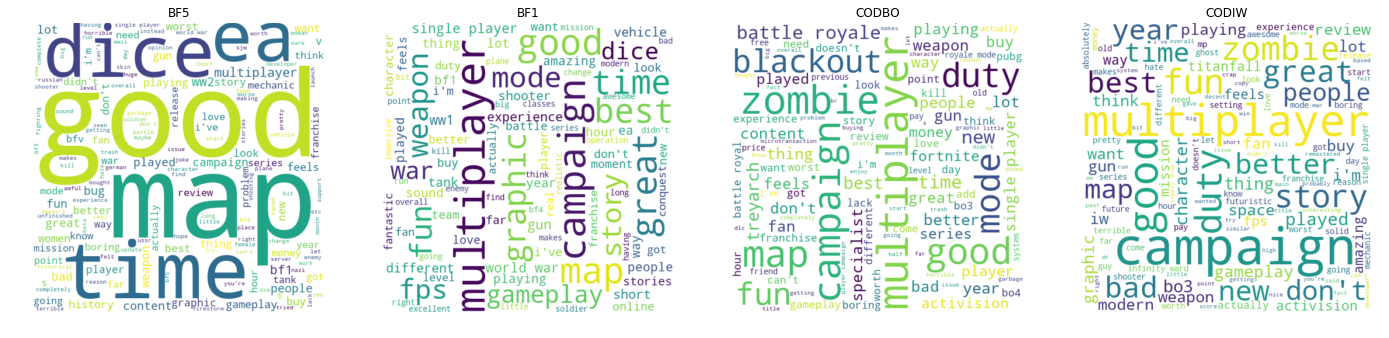

In [551]:
# Create wordcloud
from wordcloud import WordCloud, STOPWORDS

fig, axs = plt.subplots(1,4, figsize=(24,15))
for ax, review in zip(axs.ravel(), reviews_list_string):
    wordcloud = WordCloud(width = 500, height = 500,
            background_color ='white',
            stopwords = nlp.Defaults.stop_words,
            min_font_size = 10).generate(review[2])
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(review[0])
    ax.axis("off")
plt.show()

In [564]:
# Let's try to build a co-occurrence network
# co-occurrence network is a visualization method that shows word count as nodes and word relationships (words that co-occur) as edges   
# The idea is to see groups of words that tend to appear together and generate insights about the context of each review 
# This is the first time I build a co-occurrence network, so I will test the algorithm using only BF5 data

import numpy as np
import itertools

# let's set a threshold of minimum word count
def min_word_count(x):
    c_words = [w for w,k in word_freq_bf5.items() if k > x and w not in nlp.Defaults.stop_words]
    c_counts = [k for w,k in word_freq_bf5.items() if k > x and w not in nlp.Defaults.stop_words]
    return c_words, c_counts

# Minimum word count is 100 (words that appear less than 100 times will not be included in the visualization)
c_words, c_counts = min_word_count(100)

# check
print(c_words)
print()
print(c_counts)

['good', 'gameplay', 'fun', 'lot', 'bugs', 'played', 'maps', 'feels', 'bf1', 'player', 'story', 'dice', 'war', 'worst', 'great', 'history', 'people', 'campaign', 'ww2', 'time', 'multiplayer', 'bad', 'new', 'playing', 'buy', 'ea', 'women', 'content', 'historical']

[296, 124, 148, 136, 137, 170, 192, 117, 181, 111, 128, 228, 190, 129, 148, 138, 157, 152, 198, 176, 202, 170, 112, 122, 153, 225, 126, 156, 103]


In [565]:
# We need to build a matrix of word occurrence
# I use itertools.combinations function to get unique pairs of the selected words

c_word_combinations = []

for x in itertools.combinations(c_words,2):
    c_word_combinations.append(x)

# check
c_word_combinations[:10]

[('good', 'gameplay'),
 ('good', 'fun'),
 ('good', 'lot'),
 ('good', 'bugs'),
 ('good', 'played'),
 ('good', 'maps'),
 ('good', 'feels'),
 ('good', 'bf1'),
 ('good', 'player'),
 ('good', 'story')]

In [566]:
# To build the matrix of co-occurrences, I first build a matrix contianing zero values
# matrix dimensions are the number of selected words we have for this exercise

combination_matrix = np.zeros((len(c_words), len(c_words)))
combination_matrix[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [567]:
# Now I loop over each review in the dataframe for BF5
# I add +1 to row / column in the combination matrix if the pair appear in the review

for review in bf5_en["review"]:
    for word1, word2 in c_word_combinations:
        if word1 in review and word2 in review:
            combination_matrix[c_words.index(word1), c_words.index(word2)] += 1
            combination_matrix[c_words.index(word2), c_words.index(word1)] += 1

In [568]:
# This is how the combination matrix look like now
# This is also called "word co-occurrence matrix" and it shows numerically how words appears together 
combination_matrix[:5]

array([[  0.,  24.,  42.,  38.,  27.,  29.,  37.,  27.,   4.,  64.,  41.,
          4.,  39.,  19.,  26.,  20.,  37.,  27.,   9.,  48.,  30.,  44.,
         25.,  24.,  29., 125.,  19.,  38.,  21.],
       [ 24.,   0.,  22.,  20.,  16.,   8.,  21.,  14.,   3.,  32.,  21.,
          4.,  22.,   9.,  19.,  14.,  10.,  11.,   6.,  22.,  17.,  22.,
         18.,  19.,  21.,  59.,  13.,  19.,  17.],
       [ 42.,  22.,   0.,  32.,  24.,  26.,  38.,  24.,   3.,  50.,  20.,
          5.,  30.,  12.,  32.,  13.,  26.,  22.,   6.,  41.,  31.,  19.,
         24.,  23.,  22.,  89.,  17.,  23.,  23.],
       [ 38.,  20.,  32.,   0.,  32.,  26.,  28.,  12.,   4.,  43.,  24.,
          4.,  20.,  13.,  21.,  14.,  22.,  20.,   7.,  32.,  20.,  22.,
         20.,  19.,  21.,  74.,  12.,  25.,   9.],
       [ 27.,  16.,  24.,  32.,   0.,  15.,  26.,  12.,   3.,  36.,  24.,
          1.,  17.,   7.,  16.,  12.,  16.,   8.,   2.,  25.,  18.,  21.,
         17.,  17.,  18.,  63.,  16.,  24.,  14.]])

In [569]:
# Here we use Jaccard similarity coefficient.
# This coefficient is used to represent how strongly each word is associated with its pair.

from scipy.spatial import distance

jaccard_matrix = 1-distance.cdist(combination_matrix, combination_matrix, 'jaccard')
jaccard_matrix[:4]

array([[1.        , 0.03448276, 0.        , 0.06896552, 0.        ,
        0.        , 0.03448276, 0.        , 0.        , 0.        ,
        0.03448276, 0.        , 0.06896552, 0.        , 0.        ,
        0.        , 0.03448276, 0.03448276, 0.        , 0.06896552,
        0.        , 0.        , 0.03448276, 0.        , 0.03448276,
        0.        , 0.        , 0.        , 0.03448276],
       [0.03448276, 1.        , 0.06896552, 0.17241379, 0.03448276,
        0.03448276, 0.06896552, 0.03448276, 0.        , 0.        ,
        0.        , 0.        , 0.06896552, 0.10344828, 0.10344828,
        0.03448276, 0.13793103, 0.17241379, 0.        , 0.        ,
        0.03448276, 0.06896552, 0.03448276, 0.03448276, 0.06896552,
        0.        , 0.03448276, 0.03448276, 0.        ],
       [0.        , 0.06896552, 1.        , 0.03448276, 0.06896552,
        0.03448276, 0.06896552, 0.03448276, 0.        , 0.        ,
        0.10344828, 0.        , 0.17241379, 0.03448276, 0.10344828,
  

In [590]:
# Now we will build the node data that will feed the co-occurrence network

def build_nodes(selected_words, selected_counts, jaccard_matrix, focus_word=None):
    nodes = []
    for i in range(len(selected_words)):
        for j in range(i+1, len(selected_words)):
            jaccard = jaccard_matrix[i, j]
            if focus_word:
                if jaccard > 0 and (selected_words[i]==focus_word or c_words[j]==focus_word):
                    nodes.append([selected_words[i], selected_words[j], selected_counts[i], selected_counts[j], jaccard])
            else:
                if jaccard > 0:
                    nodes.append([selected_words[i], selected_words[j], selected_counts[i], selected_counts[j], jaccard])
    return nodes

nodes = build_nodes(c_words, c_counts, jaccard_matrix)
nodes[:10]

[['good', 'gameplay', 296, 124, 0.03448275862068961],
 ['good', 'lot', 296, 136, 0.06896551724137934],
 ['good', 'maps', 296, 192, 0.03448275862068961],
 ['good', 'story', 296, 128, 0.03448275862068961],
 ['good', 'war', 296, 190, 0.06896551724137934],
 ['good', 'people', 296, 157, 0.03448275862068961],
 ['good', 'campaign', 296, 152, 0.03448275862068961],
 ['good', 'time', 296, 176, 0.06896551724137934],
 ['good', 'new', 296, 112, 0.03448275862068961],
 ['good', 'buy', 296, 153, 0.03448275862068961]]

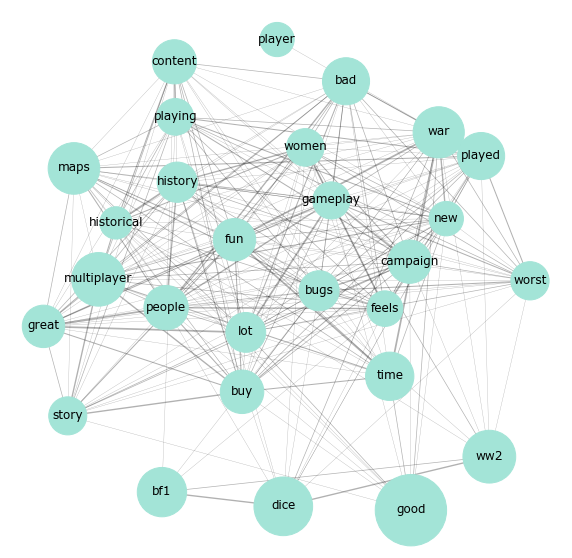

In [591]:
# Build co-occurrence network

import networkx as nx
            
def build_cooccurrence_network(network_data):
    G = nx.Graph()
    G.nodes(data=True)

    # Add nodes and edges
    for pair in nodes:
        node_x, node_y, node_x_cnt, node_y_cnt, jaccard = pair[0], pair[1], pair[2], pair[3], pair[4]
        if not G.has_node(node_x):
            G.add_node(node_x, count=node_x_cnt)
        if not G.has_node(node_y):
            G.add_node(node_y, count=node_y_cnt)
        if not G.has_edge(node_x, node_y):
            G.add_edge(node_x, node_y, weight=jaccard)

    # Use spring layout to set node position

    plt.figure(figsize=(10,10))
    pos = nx.spring_layout(G, k=1, seed=10)

    node_size = [d['count']**1.5 for (n,d) in G.nodes(data=True)]
    nx.draw_networkx_nodes(G, pos, node_color='#A3E4D7', alpha=1, node_size=node_size)
    nx.draw_networkx_labels(G, pos, fontsize=14, font_family='Verdana')

    edge_width = [d['weight']*10 for (u,v,d) in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='black', width=edge_width)
    plt.axis('off')
    return plt.show()

build_cooccurrence_network(nodes)

# Note that nodes sitting close to each other doesnt necessarilly mean that they tend to appear together
# The analyst needs to check the thickness of the lines to see if one node is strongly associated with another

The co-occurrence network above was built using words with more than 100 appearances. It looks quite busy so I will focus ona single word and rebuilt the visualization. 

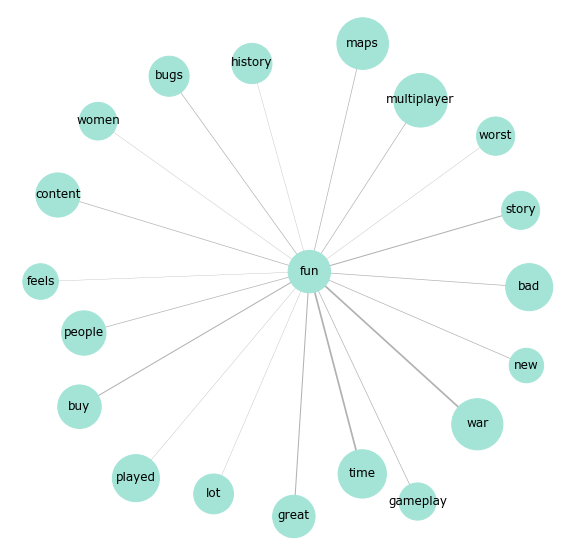

In [595]:
# Let's focus on a single word of interest
nodes = build_nodes(c_words, c_counts, jaccard_matrix, "fun")
build_cooccurrence_network(nodes)

Strong associations between the words "fun"-"time", "fun"-"war", "fun"-"story".

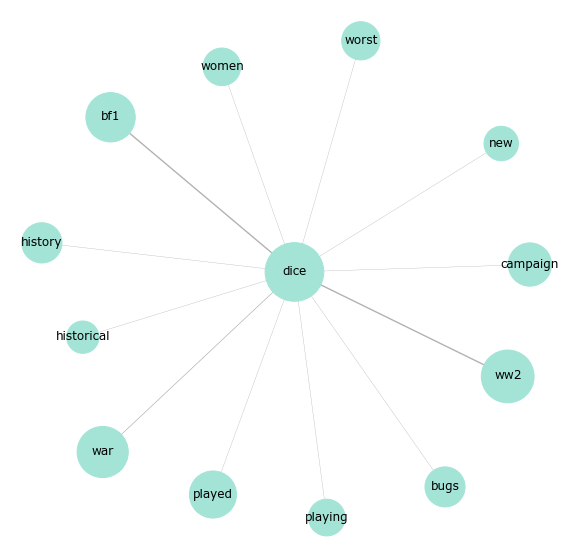

In [596]:
# Let's try "dice", which is the company in charge of the game development 
nodes = build_nodes(c_words, c_counts, jaccard_matrix, "dice")
build_cooccurrence_network(nodes)

We wee words like "bugs" and "worst" associated with Dice. Indeed, Battlefield 5 did have problems related to bugs in the first couple of months after release.

### Topic Model